In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\User\Downloads\Telcocustomerchurn\churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df = df.drop(['customerID'],axis=1)

In [6]:
df.dtypes #Total charges is object, convert it to numeric

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')#if there are any missing values they will be converted into NaN

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df_main = df.copy()

In [10]:
df.isna().sum() 


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df = df.dropna() #Handling Missing Values 

In [12]:
df.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [13]:
missing_values = df['TotalCharges'].isnull().sum()
print(missing_values)

0


In [14]:
churn_count = df['Churn'].value_counts()['Yes'] #values yes customers who have churned, Value No retined customers


In [15]:
churn_count

1869

In [16]:
total_customers = len(df)

In [17]:
percentage_churned = (churn_count / total_customers) * 100

print("Percentage of customers who have left the company:", round(percentage_churned, 2), "%")

Percentage of customers who have left the company: 26.58 %


In [18]:
#Feature selection for our dependent/target variable 'Churn' lets see the features which have most impact.

In [19]:
#Performing label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod','OnlineBackup','Churn']

In [22]:
labecn = LabelEncoder()
for col in categorical_cols:
    df[col] = labecn.fit_transform(df[col])

In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [24]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(X,y)

RandomForestClassifier()

In [28]:
feature_importances = model.feature_importances_

In [29]:
feature_importances

array([0.02743915, 0.020496  , 0.02208884, 0.01916638, 0.16609351,
       0.00456883, 0.02187194, 0.03061376, 0.04982734, 0.02497428,
       0.0218887 , 0.03748702, 0.01693382, 0.01695432, 0.0703415 ,
       0.02505145, 0.05113871, 0.18393083, 0.18913359])

In [30]:
df_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


In [31]:
df_feature_importance

,Feature,Importance
0,gender,0.027439
1,SeniorCitizen,0.020496
2,Partner,0.022089
3,Dependents,0.019166
4,tenure,0.166094
5,PhoneService,0.004569
6,MultipleLines,0.021872
7,InternetService,0.030614
8,OnlineSecurity,0.049827
9,OnlineBackup,0.024974


In [32]:
df_feature_importance = df_feature_importance.sort_values('Importance',ascending=False)

In [33]:
df_feature_importance

,Feature,Importance
18,TotalCharges,0.189134
17,MonthlyCharges,0.183931
4,tenure,0.166094
14,Contract,0.070341
16,PaymentMethod,0.051139
8,OnlineSecurity,0.049827
11,TechSupport,0.037487
7,InternetService,0.030614
0,gender,0.027439
15,PaperlessBilling,0.025051


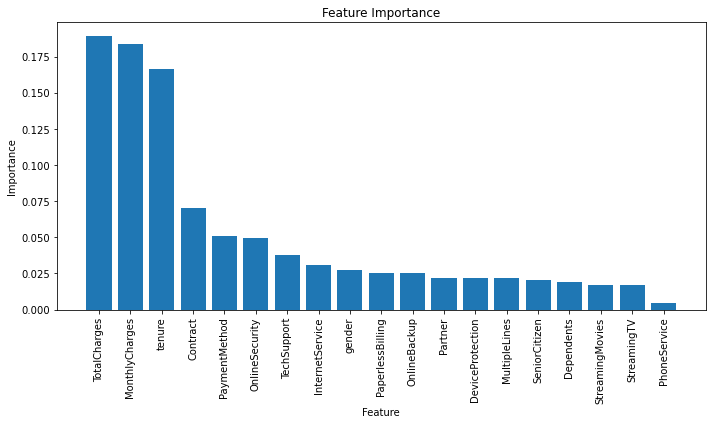

In [34]:
import matplotlib.pyplot as plt

features = df_feature_importance['Feature']
importance_scores = df_feature_importance['Importance']

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, importance_scores)
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [35]:
top_features = df_feature_importance.nlargest(5, 'Importance')['Feature'] # considering top 5 features


In [36]:
top_features

18      TotalCharges
17    MonthlyCharges
4             tenure
14          Contract
16     PaymentMethod
Name: Feature, dtype: object

In [37]:
#lets do some feature engineering. 

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

In [39]:
df['TotalCharges_bin'] = pd.qcut(df['TotalCharges'], q=3, labels=['Low', 'Medium', 'High'])
df['MonthlyCharges_bin'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['Low', 'Medium', 'High'])

In [40]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_bin,MonthlyCharges_bin
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,Low,Low
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,Medium,Medium
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,Low,Medium
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,Medium,Low
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,1,1,3,84.80,1990.50,0,Medium,High
7039,0,0,1,1,72,1,2,1,0,2,...,2,2,1,1,1,103.20,7362.90,0,High,High
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,1,2,29.60,346.45,0,Low,Low
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,1,3,74.40,306.60,1,Low,Medium


In [41]:
cross_tab = pd.crosstab(index=df['TotalCharges_bin'], columns=[df['MonthlyCharges_bin'], df['Churn']])
print(cross_tab)


MonthlyCharges_bin   Low      Medium       High     
Churn                  0    1      0    1     0    1
TotalCharges_bin                                    
Low                 1027  317    337  421    54  188
Medium               906   53    633  216   249  287
High                  39    3    677   61  1241  323


#cross-tabulation or contingency table that shows the counts of customers based on their churn status ('Churn') and the combinations of 'MonthlyCharges_bin' and 'TotalCharges_bin'

#'Churn' column:
#0.0 represents customers who have not churned (still active/retained).
#1.0 represents customers who have churned.
we should also convert the churn to a contnious variable

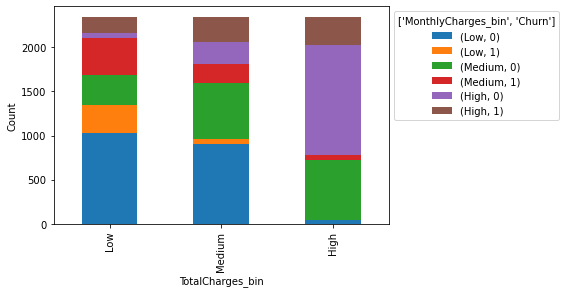

In [42]:
import matplotlib.pyplot as plt
cross_tab.plot.bar(stacked=True)
plt.xlabel('TotalCharges_bin')
plt.ylabel('Count')
plt.legend(title=['MonthlyCharges_bin', 'Churn'], bbox_to_anchor=(1, 1))
plt.show()

In [43]:
#heatmap would be easy to understand 

In [44]:
cross_tab

MonthlyCharges_bin   Low      Medium       High     
Churn                  0    1      0    1     0    1
TotalCharges_bin                                    
Low                 1027  317    337  421    54  188
Medium               906   53    633  216   249  287
High                  39    3    677   61  1241  323

Churn=0.0: The count is 1027, which means there are 1027 customers in this category who have not churned (i.e., they are still active customers). even after having low month charges and low total charges 
Churn=1.0: The count is 317, indicating that there are 317 customers in this category who have churned (i.e., they have discontinued their services).

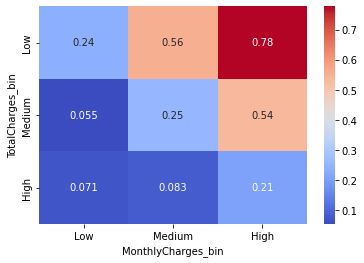

In [45]:
import seaborn as sns
cross_tab = pd.crosstab(index=df['TotalCharges_bin'], columns=df['MonthlyCharges_bin'], values=df['Churn'], aggfunc='mean')
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.xlabel('MonthlyCharges_bin')
plt.ylabel('TotalCharges_bin')
plt.show()

Each cell in the heatmap represents the churn rate (or churn probability) for a specific combination of 'TotalCharges_bin' and 'MonthlyCharges_bin'.

#Customers with Low Total charges and High monthly charges require special attention to reduce churn and improve customer retention strategies.





High Monthly Charges and Low Total Charges: This combination has the highest churn rate of 0.78. The company should investigate the reasons behind this high churn and consider strategies such as price optimization, bundling services, or offering discounts to improve customer retention.

High Monthly Charges and Medium Total Charges: With a churn rate of 0.54, the company should analyze the factors contributing to the high churn and identify areas for improvement. This may include offering competitive pricing, value-added services, or targeted promotions to increase customer loyalty.

In [46]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_bin,MonthlyCharges_bin
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,Low,Low
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,Medium,Medium
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,Low,Medium
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,Medium,Low
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,1,1,3,84.80,1990.50,0,Medium,High
7039,0,0,1,1,72,1,2,1,0,2,...,2,2,1,1,1,103.20,7362.90,0,High,High
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,1,2,29.60,346.45,0,Low,Low
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,1,3,74.40,306.60,1,Low,Medium


#No we have the important features and Tenure, Monthlycharges  and total charges and we have also have an understanding of thier dependency from the heat map

In [47]:
#applying logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [49]:
X = df[['TotalCharges', 'MonthlyCharges', 'tenure']]
y = df['Churn']

In [50]:
#X

In [51]:
#y

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
model = LogisticRegression()


In [54]:
model.fit(X_train, y_train)


LogisticRegression()

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [56]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7796730632551528


In [57]:
from sklearn.metrics import classification_report


In [58]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



The model has a high ability to identify customers who are likely to stay active (class NO) with a precision of 0.81 and a recall of 0.91. This can be valuable for targeted retention strategies, focusing on retaining these customers and reducing customer churn.

Although the model performs well in predicting customers who have not churned, there is room for improvement in identifying customers who have churned (class Yes). The precision for class 1 is 0.62, indicating that there is a moderate number of false positives, and the recall is 0.43, suggesting that there is a potential to capture more customers who have churned.

The overall accuracy of the model is 0.82, meaning that it correctly predicts the class labels for approximately 82% of the samples. This can provide a useful baseline for assessing the model's performance and monitoring customer churn in the business context.

In [59]:
df['TotalCharges_Per_Month'] = df['TotalCharges'] / df['tenure']


In [60]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_bin,MonthlyCharges_bin,TotalCharges_Per_Month
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,Low,Low,29.850000
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,Medium,Medium,55.573529
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,Low,Medium,54.075000
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,Medium,Low,40.905556
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,Low,Medium,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,1,1,3,84.80,1990.50,0,Medium,High,82.937500
7039,0,0,1,1,72,1,2,1,0,2,...,2,1,1,1,103.20,7362.90,0,High,High,102.262500
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,1,2,29.60,346.45,0,Low,Low,31.495455
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,1,3,74.40,306.60,1,Low,Medium,76.650000


In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a scaler object
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max scaling to 'Tenure', 'MonthlyCharges', and 'TotalCharges'
df['Tenure_scaled'] = minmax_scaler.fit_transform(df[['tenure']])
df['MonthlyCharges_scaled'] = minmax_scaler.fit_transform(df[['MonthlyCharges']])
df['TotalCharges_scaled'] = minmax_scaler.fit_transform(df[['TotalCharges']])

# Apply Standardization to 'Tenure', 'MonthlyCharges', and 'TotalCharges'
df['Tenure_standardized'] = standard_scaler.fit_transform(df[['tenure']])
df['MonthlyCharges_standardized'] = standard_scaler.fit_transform(df[['MonthlyCharges']])
df['TotalCharges_standardized'] = standard_scaler.fit_transform(df[['TotalCharges']])

In [62]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,TotalCharges_bin,MonthlyCharges_bin,TotalCharges_Per_Month,Tenure_scaled,MonthlyCharges_scaled,TotalCharges_scaled,Tenure_standardized,MonthlyCharges_standardized,TotalCharges_standardized
0,0,0,1,0,1,0,1,0,0,2,...,0,Low,Low,29.850000,0.000000,0.115423,0.001275,-1.280248,-1.161694,-0.994194
1,1,0,0,0,34,1,0,0,2,0,...,0,Medium,Medium,55.573529,0.464789,0.385075,0.215867,0.064303,-0.260878,-0.173740
2,1,0,0,0,2,1,0,0,2,2,...,1,Low,Medium,54.075000,0.014085,0.354229,0.010310,-1.239504,-0.363923,-0.959649
3,1,0,0,0,45,0,1,0,2,0,...,0,Medium,Low,40.905556,0.619718,0.239303,0.210241,0.512486,-0.747850,-0.195248
4,0,0,0,0,2,1,0,1,0,0,...,1,Low,Medium,75.825000,0.014085,0.521891,0.015330,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,0,Medium,High,82.937500,0.323944,0.662189,0.227521,-0.343137,0.664868,-0.129180
7039,0,0,1,1,72,1,2,1,0,2,...,0,High,High,102.262500,1.000000,0.845274,0.847461,1.612573,1.276493,2.241056
7040,0,0,1,1,11,0,1,0,2,0,...,0,Low,Low,31.495455,0.140845,0.112935,0.037809,-0.872808,-1.170004,-0.854514
7041,1,1,1,0,4,1,2,1,0,0,...,1,Low,Medium,76.650000,0.042254,0.558706,0.033210,-1.158016,0.319168,-0.872095


In [63]:
X = df[['Tenure_scaled', 'MonthlyCharges_scaled', 'TotalCharges_scaled']]
y = df['Churn']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
model = LogisticRegression()


In [66]:
model.fit(X_train, y_train)


LogisticRegression()

In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [68]:
y_pred = model.predict(X_test)

In [69]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7803837953091685


In [70]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.63      0.42      0.50       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



In [71]:
#IMPLEMENTING RANDOMFOREST

In [72]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,TotalCharges_bin,MonthlyCharges_bin,TotalCharges_Per_Month,Tenure_scaled,MonthlyCharges_scaled,TotalCharges_scaled,Tenure_standardized,MonthlyCharges_standardized,TotalCharges_standardized
0,0,0,1,0,1,0,1,0,0,2,...,0,Low,Low,29.850000,0.000000,0.115423,0.001275,-1.280248,-1.161694,-0.994194
1,1,0,0,0,34,1,0,0,2,0,...,0,Medium,Medium,55.573529,0.464789,0.385075,0.215867,0.064303,-0.260878,-0.173740
2,1,0,0,0,2,1,0,0,2,2,...,1,Low,Medium,54.075000,0.014085,0.354229,0.010310,-1.239504,-0.363923,-0.959649
3,1,0,0,0,45,0,1,0,2,0,...,0,Medium,Low,40.905556,0.619718,0.239303,0.210241,0.512486,-0.747850,-0.195248
4,0,0,0,0,2,1,0,1,0,0,...,1,Low,Medium,75.825000,0.014085,0.521891,0.015330,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,0,Medium,High,82.937500,0.323944,0.662189,0.227521,-0.343137,0.664868,-0.129180
7039,0,0,1,1,72,1,2,1,0,2,...,0,High,High,102.262500,1.000000,0.845274,0.847461,1.612573,1.276493,2.241056
7040,0,0,1,1,11,0,1,0,2,0,...,0,Low,Low,31.495455,0.140845,0.112935,0.037809,-0.872808,-1.170004,-0.854514
7041,1,1,1,0,4,1,2,1,0,0,...,1,Low,Medium,76.650000,0.042254,0.558706,0.033210,-1.158016,0.319168,-0.872095


In [73]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_bin',
       'MonthlyCharges_bin', 'TotalCharges_Per_Month', 'Tenure_scaled',
       'MonthlyCharges_scaled', 'TotalCharges_scaled', 'Tenure_standardized',
       'MonthlyCharges_standardized', 'TotalCharges_standardized'],
      dtype='object')

In [74]:
df = df[['Tenure_scaled','MonthlyCharges_scaled','TotalCharges_scaled','Churn']]

In [79]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.759772565742715


In [80]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=42)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.783226723525231


In [81]:
df_main

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
svc 0.78
Randomforest 0.76
logisitc 0.78

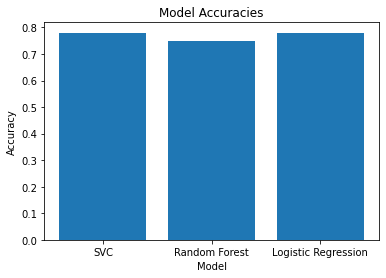

In [84]:
models = ['SVC', 'Random Forest', 'Logistic Regression']
accuracies = [0.78,0.75, 0.78]
plt.bar(models, accuracies)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

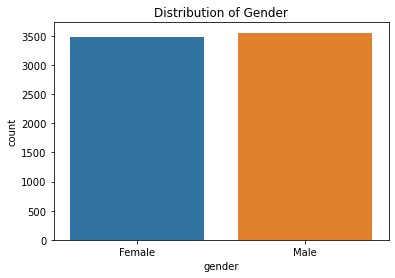

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='gender', data=df_main)
plt.title('Distribution of Gender')
plt.show()

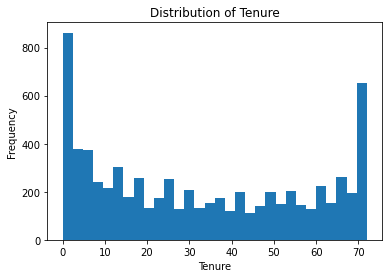

In [88]:
plt.hist(df_main['tenure'], bins=30)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

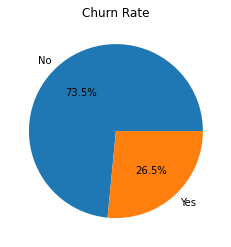

In [89]:
churn_counts = df_main['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()


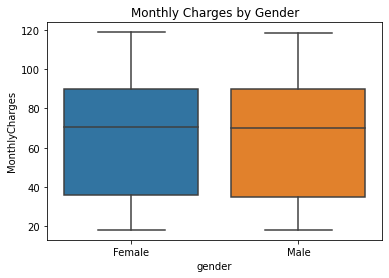

In [90]:
sns.boxplot(x='gender', y='MonthlyCharges', data=df_main)
plt.title('Monthly Charges by Gender')
plt.show()

The box plot indicates that the middle 50% of the data (the box) and the minimum and maximum values (the whiskers) are relatively consistent between genders. This suggests that there are no substantial differences in the distribution of monthly charges between the genders.

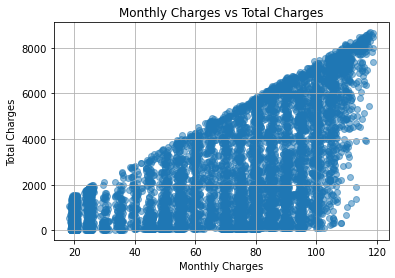

In [99]:
plt.scatter(df_main['MonthlyCharges'], df_main['TotalCharges'], alpha=0.5)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs Total Charges')
plt.grid(True)
plt.show()

points are clustered tightly and form a linear pattern from the bottom left to the top right, it suggests a strong positive correlation between monthly charges and total charges.